In [506]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torchvision import datasets, transforms
#from complexPyTorch.complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear
#from complexPyTorch.complexLayers import ComplexDropout2d, NaiveComplexBatchNorm2d
#from complexPyTorch.complexLayers import ComplexBatchNorm1d
#from complexPyTorch.complexFunctions import complex_relu, complex_max_pool2d

#non complex model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import pickle
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, peak_widths

import cvnn.layers as complex_layers

import joblib 

In [643]:
data = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_absorbance.csv')
data_np= np.array(data)
data_500 = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_500.csv')
data_1000 = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_1000.csv')

In [644]:
data_np = np.array(data_500)

In [645]:
data_np[1,4]

'-0.8652262202242633+0.48654746248487213j          '

In [646]:
data=data_500

In [647]:
data_abs=[]
data_s11=[]
data_param=[]
flag=0
#reshaping the data for better usebility
for j in range(0,len(data_np),50):
    row=[]
    row2=[]
    value3= data_np[flag,0:3]
    data_param.append(value3)
    for i in range(0,50,1):
        absob = data_np[flag,5]
        s11= data_np[flag,4]
        row.append(absob)
        row2.append(s11)
        flag=flag+1
    data_abs.append(row)
    data_s11.append(row2)
   

In [648]:
data_s11=np.array(data_s11,dtype='complex64')
data_abs=np.array(data_abs,dtype='float64')
data_param=np.array(data_param,dtype='float32')

In [649]:
print(data_param)

[[ 4.4085   11.372     0.11014 ]
 [ 4.9258   13.579     0.44504 ]
 [ 4.7305   12.017     0.15078 ]
 ...
 [ 4.5539   12.667     0.33413 ]
 [ 2.8326   11.836     0.16772 ]
 [ 3.3325   10.862     0.018897]]


In [650]:
x_freq = np.linspace(0,5,50)

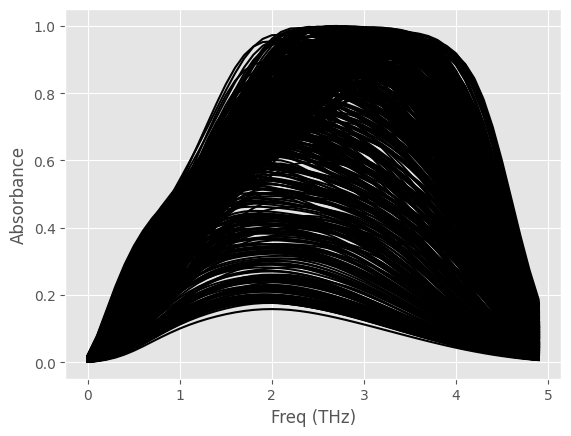

In [651]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[:,:].T,label='complex', color='black')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("Freq (THz)")
    plt.ylabel("Absorbance")
    plt.show()
   # plt.legend()

In [652]:
data_abs.shape

(500, 50)

In [653]:
data_pk=[]
data_am=[]
data_qf=[]
pos=[]
d_m=[]
d_m2=[]

In [654]:
#getting peaks and saving discarded points
for i in range(len(data_abs)):
    peaks, _ = find_peaks(data_abs[i,:],height=0.5)
    if len(peaks)==1:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
    elif len(peaks)==2:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
        d_m2.append(i)
    else:
        d_m.append(i)
        

In [655]:
discard_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(d_m)):
    j = d_m[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    discard_data = pd.concat([discard_data, pd.DataFrame(k)], ignore_index=True)

In [656]:
i=0
j=0
k=0
x_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j = pos[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    x_data = pd.concat([x_data, pd.DataFrame(k)], ignore_index=True)


In [657]:
i=0
m=0
j=0
y_data = pd.DataFrame()
y_data_abs = []
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j=pos[i]
    m = pd.DataFrame({"Peak":data_pk[i][0],"Amp":data_am[i][0],"Q-Factor":(data_pk[i][0]/data_qf[i][0])},index=[i])
    y_data = pd.concat([y_data, pd.DataFrame(m)], ignore_index=True)
    y_data_abs.append(data_abs[j,:])

In [659]:
y_data.to_csv('filtered_features_data.csv')

In [660]:
x_data.to_csv('fitered_x_data.csv')

AttributeError: 'list' object has no attribute 'to_csv'

In [522]:
discard_data=np.array(discard_data)

In [662]:
y_data=np.array(y_data)
x_data=np.array(x_data)
y_data_abs = np.array(y_data_abs)

In [663]:
y_data_abs.tofile('filtered_waveform_data.csv', sep = ',')

In [528]:
y_data.shape

(378, 3)

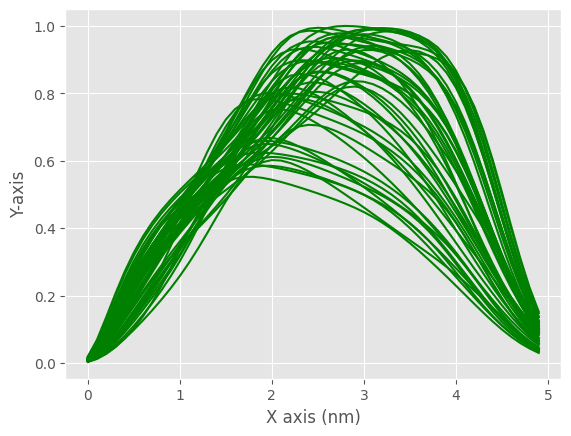

[]


In [526]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
#peaks, _ = find_peaks(data_abs[0,:],height=0.6)
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,y_data_abs[0:50].T, color='green')
#    plt.plot((y_data[13,0]/10), 0.98746435, "x")
 #   plt.plot((y_data[13,0]/10), 0.9323343, "o")

  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()


print(peaks)
   # plt.legend()

In [22]:
# #data interpolation
# w1=np.arange(0,5,0.1)
# w2=np.arange(0, 5,0.01)
# ynew=[]
# for i in range(0,len(y_data_abs)):
#     row = np.interp(w2, w1, y_data_abs[i,:])
#     ynew.append(row)

# ynew=np.array(ynew)

In [23]:
# data_pk=[]
# data_am=[]
# data_qf=[]
# pos=[]
# d_m=[]
# d_m2=[]

In [24]:
# #getting peaks for interpolated data
# for i in range(len(ynew)):
#     peaks, _ = find_peaks(ynew[i,:],height=0.6)
#     if len(peaks)==1:
#         data_pk.append(peaks)
#         data_am.append(ynew[i,(peaks)])
#         j = peak_widths(ynew[i,:], peaks, rel_height=0.5)
#         data_qf.append(j[0])
#         pos.append(i)
#     elif len(peaks)==2:
#         data_pk.append(peaks)
#         data_am.append(ynew[i,(peaks)])
#         j = peak_widths(ynew[i,:], peaks, rel_height=0.5)
#         data_qf.append(j[0])
#         pos.append(i)
#         d_m2.append(i)
#     else:
#         d_m.append(i)

In [25]:
# i=0
# m=0
# j=0
# y_data = pd.DataFrame()
# y_data_abs = []
# #getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
# for i in range(0,len(pos)):
#     j=pos[i]
#     m = pd.DataFrame({"Peak":data_pk[i][0],"Amp":data_am[i][0],"Q-Factor":(data_pk[i][0]/data_qf[i][0])},index=[i])
#     y_data = pd.concat([y_data, pd.DataFrame(m)], ignore_index=True)
#     y_data_abs.append(data_abs[j,:])

In [26]:
# y_data=np.array(y_data)
# x_data=np.array(x_data)
# y_data_abs = np.array(y_data_abs)

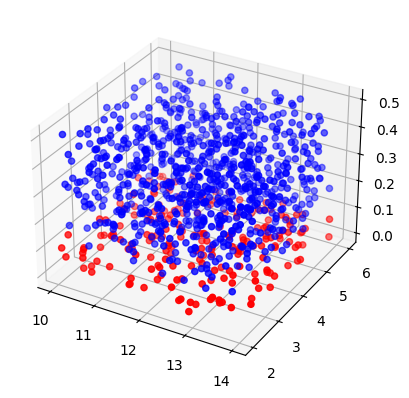

In [366]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_data[:,1],x_data[:,0],x_data[:,2],color='blue')
ax.scatter(discard_data[:,1],discard_data[:,0],discard_data[:,2], color ='red')
plt.show()

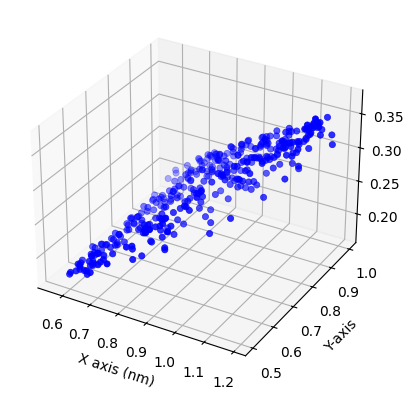

In [151]:
w2=np.arange(0,341,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_data[:,2],y_data[:,1],y_data[:,0]/100,color='blue')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

In [527]:
#Splitting data for both models 

scaler = MinMaxScaler()
X = scaler.fit_transform(data_param)
Y= scaler.fit_transform(data_abs)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

In [619]:

# Assuming X and Y are your feature and target matrices respectively
# Split the data into training and testing sets
X_train_m1 = X_train
X_test_m1 = X_test
X_val_m1 = X_val
y_val_m1 = y_val
y_train_m1= y_train
y_test_m1=y_test



# Create a Sequential model
model_1 = Sequential()



# best_metric = 1
# model_metric= 1
# log=[]
# ind=[]
# for i in range (0,50,1):
#     if best_metric <= model_metric:
# Add the input layer and the first hidden layer
model_1.add(Dense(28, input_shape=(3,), activation='relu'))  # Assuming 64 neurons in the first hidden layer

# Add additional hiden layers if needed
model_1.add(Dense(29, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(32, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(640, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(360, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(128, activation='relu'))  # Example of adding another hidden layer

# Add the output layer
model_1.add(Dense(1, activation='linear'))  # Assuming 5 design parameters, using linear activation

# Compile the model
model_1.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function

# Print a summary of the model
model_1.summary()

#Early stopping 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# Train the model
history = model_1.fit(X_train_m1, y_train_m1, epochs=5000, verbose=1, callbacks=[es], batch_size=32,validation_data=(X_val_m1, y_val_m1))

# Make predictions
predictions = model_1.predict(X_test_m1)  # Replace X_test with your actual test data
model_metric = nmrs(predictions,y_test_m1)
print(f'NMRSE: {model_metric}')
# log.append(model_metric)
# ind.append(i)
    # else:
    #     best_metric= model_metric



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 28)                112       
                                                                 
 dense_138 (Dense)           (None, 29)                841       
                                                                 
 dense_139 (Dense)           (None, 1)                 30        
                                                                 
Total params: 983 (3.84 KB)
Trainable params: 983 (3.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5000
10/10 [==============================] - 1s 30ms/step - loss: 0.3836 - val_loss: 0.3442
Epoch 2/5000
10/10 [==============================] - 0s 10ms/step - loss: 0.2154 - val_loss: 0.2060
Epoch 3/5000
10/10 [==============================] - 0s 9ms/step - loss: 0.1180 - va

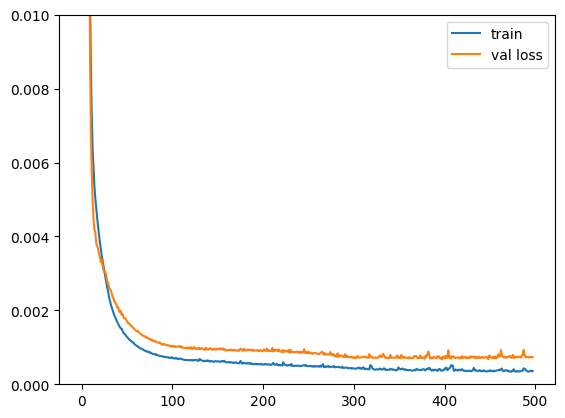

In [620]:


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylim(0, 0.01)
plt.legend()
#plt.savefig('loss - Relu - 2L_40N_1F', bbox_inches='tight')
plt.show()

3

In [370]:


# save model with joblib 
filename = '3L_30_31_32N_RELU_50feature_ES.sav'
pickle.dump(model_1, open(filename, 'wb'))

In [637]:

import torch
import torch.nn as nn
import torch.optim as optim


# %%
# Load CSV files


def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)
    
def resume(model, filename):
    model.load_state_dict(torch.load(filename))
    
# Extract input and output data
# Convert to PyTorch tensors

#print(f"input data:{X}, output data: {y}")
X_train_m2 =  torch.tensor(X_train, dtype=torch.float32)
X_test_m2 =  torch.tensor(X_test, dtype=torch.float32)
X_val_m2 = torch.tensor(X_val, dtype=torch.float32)
y_val_m2 = torch.tensor(y_val, dtype=torch.float32)
y_train_m2= torch.tensor(y_train, dtype=torch.float32)
y_test_m2= torch.tensor(y_test, dtype=torch.float32)


# Define the neural network
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MyNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_sizes[0]),
            nn.GELU()
        ])
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                nn.GELU()
            ])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x



In [638]:
### best_matric=1
# model_matric=1
# log_loss=[]
# log=[]
# ind=[]
# for i in range(1,9,1):
#     if(best_matric <= model_matric):
        # Define the input, hidden, and output sizes
input_size = X.shape[1]
hidden_sizes = [28,29,31]  # Adjust the number of neurons and layers as needed
output_size = 3

# Create an instance of the neural network
model = MyNeuralNetwork(input_size, hidden_sizes, output_size)
print(model)
# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=(0.0001)) # Adaptive Moment Estimation

    
# Training loop
num_epochs = 50000

early_stop_thresh = 170
best_loss = 1000
best_epoch = 5
 
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_m2)
    loss = criterion(outputs, y_train_m2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    
# Make predictions on new data
    with torch.no_grad():
        new_data = X_val_m2.clone().detach().requires_grad_(True)
        val_predictions  = model(new_data)

# Evaluate the model on the test set
    val_loss = criterion(val_predictions, y_val_m2)
    print(f'Validation MSE: {val_loss.item():.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        best_epoch = epoch
        checkpoint(model,"best_model.pth")
        print(f'Epoch [{epoch+1}/{num_epochs}], Training MSE: {loss.item():.4f}')
    elif epoch-best_epoch > early_stop_thresh:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training MSE: {loss.item():.4f}')
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop
resume(model, "best_model.pth")



with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        test_predict  = model(new_data)
# Convert predictions to numpy array if needed
predictions_m2 = test_predict.numpy()


# Evaluate the model on the test set
test_loss = criterion(test_predict, y_test_m2)
#print(f'Test MSE: {test_loss.item():.4f}')
model_matric = nmrs(predictions_m2,y_test)
print(f'NMRSE: {model_matric}')
    #     log_loss.append(val_loss)
    #     log.append(model_matric)
    #     ind.append(i)
    # else:
    #     best_matric = model_matric


MyNeuralNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=28, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=28, out_features=29, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=29, out_features=31, bias=True)
    (5): GELU(approximate='none')
  )
  (output_layer): Linear(in_features=31, out_features=3, bias=True)
)
Validation MSE: 0.4757
Epoch [1/50000], Training MSE: 0.4080
Validation MSE: 0.4751
Epoch [2/50000], Training MSE: 0.4074
Validation MSE: 0.4744
Epoch [3/50000], Training MSE: 0.4068
Validation MSE: 0.4737
Epoch [4/50000], Training MSE: 0.4062
Validation MSE: 0.4731
Epoch [5/50000], Training MSE: 0.4056
Validation MSE: 0.4724
Epoch [6/50000], Training MSE: 0.4050
Validation MSE: 0.4718
Epoch [7/50000], Training MSE: 0.4045
Validation MSE: 0.4711
Epoch [8/50000], Training MSE: 0.4039
Validation MSE: 0.4705
Epoch [9/50000], Training MSE: 0.4033
Validation MSE: 0.4698
Epoch [10/50000], Trainin

In [529]:
#y_test = y_test.numpy()

from numpy import linalg as LA

def nmrs (pred_np,y_tst):
    x=LA.norm(y_tst-pred_np)/LA.norm(y_tst-np.mean(y_tst))
    return x


In [395]:
y_data.shape

(797, 3)

In [635]:
# save model with joblib 
filename = '3L_18_19_21N_GELU_2F.sav'
joblib.dump(model, filename)

['3L_18_19_21N_GELU_2F.sav']

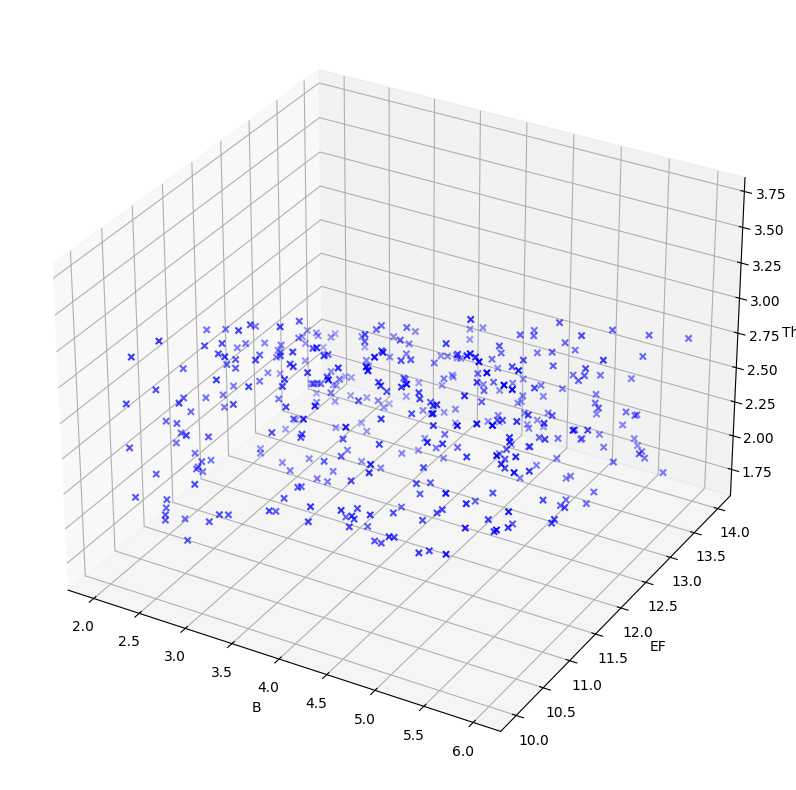

In [505]:
w2=np.arange(0,50,1) #
fig = plt.figure( figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
#with plt.style.context('classic'): #sanity check if correct waveforms are loaded
ax.scatter(x_data[:,0],x_data[:,1],y_data[:,0]/10,color='blue', marker='x')
#ax.scatter(y_data[:,0],x_data[:,2], color='red')
#ax.scatter(y_data[:,0],x_data[:,1],color='blue')
#    ax.scatter(predictions[:,1],predictions[:,0], color='green')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
plt.xlabel("B")
ax.set_ylabel("EF")
ax.set_zlabel("Thz")
plt.tight_layout()              
plt.show()
   

In [310]:
y_test.T.shape

(35,)

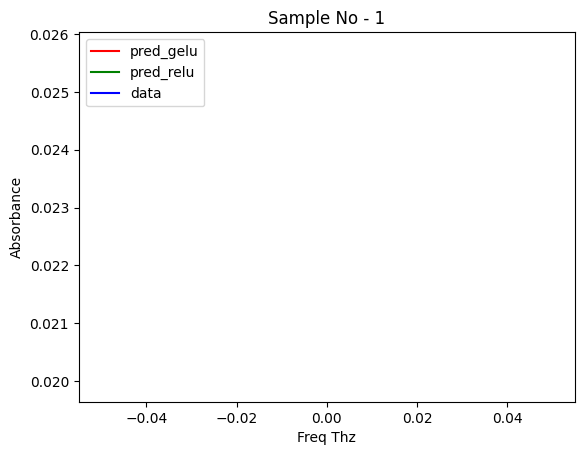

In [306]:
from sklearn.metrics import r2_score
#plot for fullwaveform predictions
w2=np.linspace(0,5,1) #
plt.plot(w2,predictions_m2[10,0],label="pred_gelu", color="red")
plt.plot(w2,predictions[10,0],label="pred_relu", color="green")
plt.plot(w2,y_test[10,0],label="data",color="blue")
#plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[34,:], predictions[34,:])), (5, 0.7))
#plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[34,:], predictions_m2[34,:])), (5, 0.65))
plt.annotate("Global ReLU NMRSE = {:.3f}".format(nmrs(predictions[:,:],y_test[:,:])), (5, 0.7))
plt.annotate("Global GeLU NMRSE = {:.3f}".format(nmrs(predictions_m2[:,:],y_test[:,:])), (5, 0.65))
   # plt.plot(w1,Y[2,:], color='green')
    #plt.plot(w1,Y[3,:], color='blue')
    #plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
plt.title("Sample No - 1")
plt.xlabel("Freq Thz")
plt.ylabel("Absorbance")
plt.legend(loc="upper left")
plt.show()


In [636]:
#Splitting data for both models 

scaler = MinMaxScaler()
X = scaler.fit_transform(x_data)
Y= scaler.fit_transform(y_data)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

In [603]:
m1 = pickle.load(open('2L_30_31N_RELU_0feature_ES.sav', 'rb'))
#x = pickle.load('1L_100N_GELU_3feature_ES.sav')
L_pred_1 = m1(X_test)
pred_1 = L_pred_1.numpy()


x = pickle.load(open('2L_28N_GELU_2F_ES.sav', 'rb'))
with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        pred_2 = x(new_data)
pred_2 = pred_2.numpy()


# m2 = pickle.load(open('2L_28N_GELU_1F_ES.sav', 'rb'))
# #x = pickle.load('1L_100N_GELU_3feature_ES.sav')
# with torch.no_grad():
#         new_data = X_test_m2.clone().detach().requires_grad_(True)
#         pred_2 = m2(new_data)
# pred_2= pred_2.numpy()

# m3 = pickle.load(open('2L_28N_GELU_2F_ES.sav', 'rb'))
# #x = pickle.load('1L_100N_GELU_3feature_ES.sav')
# with torch.no_grad():
#         new_data = X_test_m2.clone().detach().requires_grad_(True)
#         pred_3 = m3(new_data)
# pred_3= pred_3.numpy()


In [587]:
pred_1.shape

(38, 1)

In [639]:

pred_inv = scaler.inverse_transform(predictions_m2)
data_inv = scaler.inverse_transform(y_test)

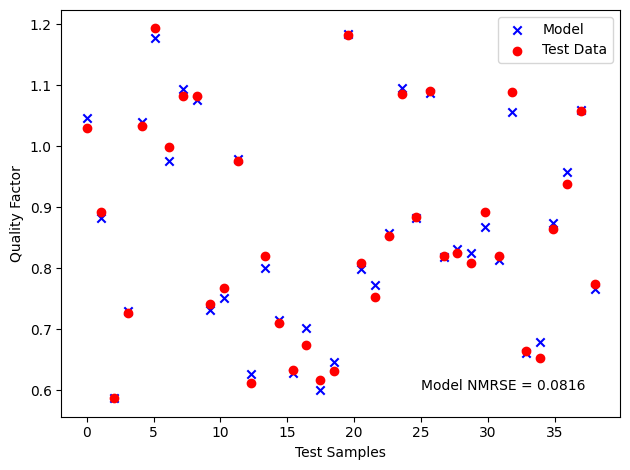

In [634]:
w1=np.linspace(0,38,38)

plt.scatter(w1,pred_inv,label="Model", marker='x', color="blue")
plt.scatter(w1,data_inv,label="Test Data",color="red")
plt.annotate("Model NMRSE = {:.4f}".format(nmrs(pred_inv,data_inv)), (25, 0.6))
plt.xlabel("Test Samples")
plt.ylabel("Quality Factor")
plt.legend(loc="upper right")
  #  axs[2].set_ylim(0.5, 1)
  # axs[2].set_title("1 Layer - 100 Neurons N.N")
plt.tight_layout()
#plt.savefig('3Model_Pred', bbox_inches='tight')
plt.show()

In [436]:
predata=np.append(predata,pred_3,axis=1)

In [435]:
ydata=np.append(ydata,y_test_m3,axis=1)
predata=np.append(pred_1,pred_2,axis=1)

In [465]:


#pred_inv_m1 = scaler.inverse_transform(predictions)

In [466]:
y_test.shape

(38, 3)

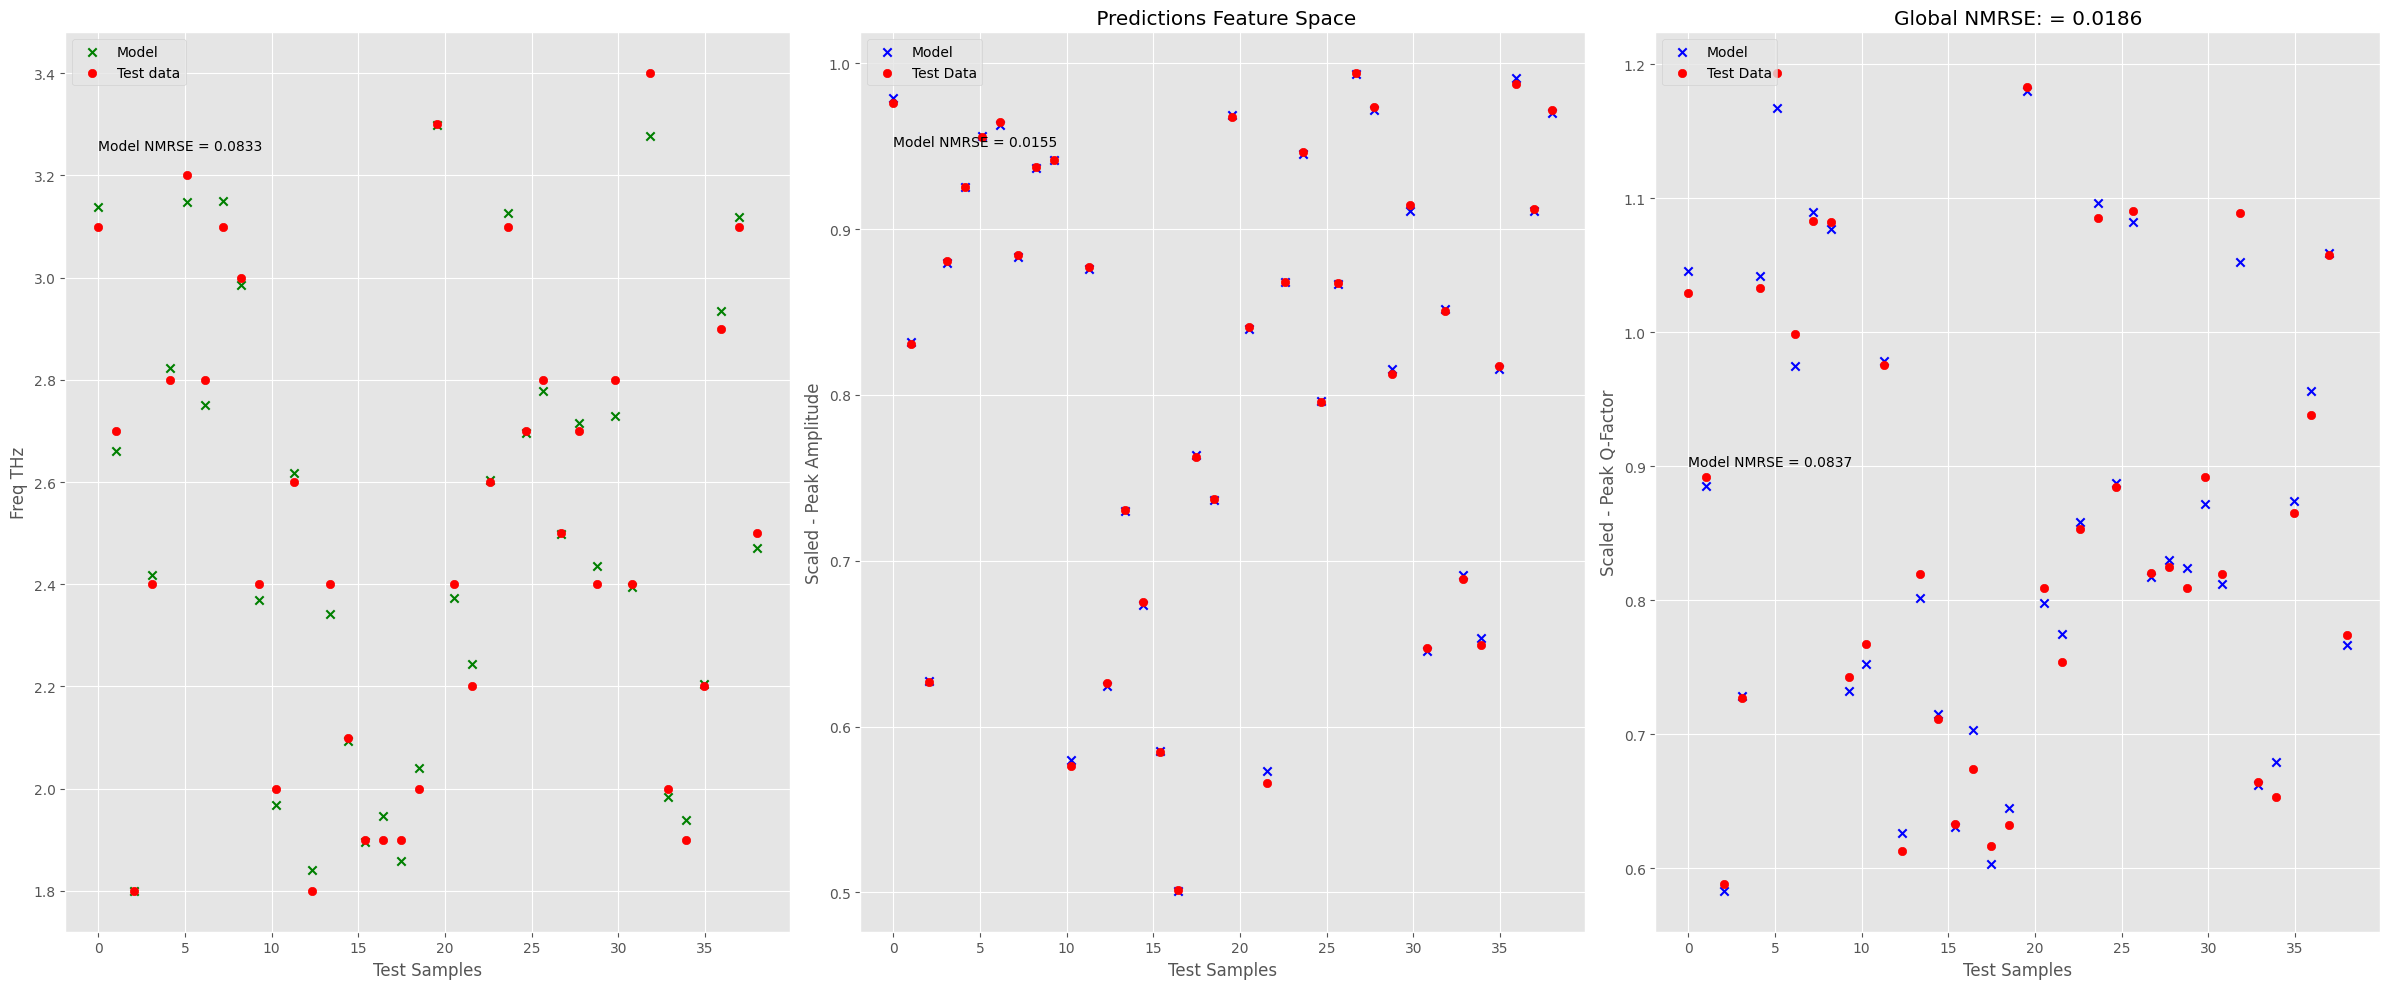

In [642]:
w1=np.linspace(0,38,38)
with plt.style.context('ggplot'):#sanity check if correct waveforms are loaded
    fig, axs = plt.subplots(1, 3, figsize=(24, 10))
#plot for 3 features output
   # axs[0].scatter(w1,pred_inv[:,0]/10,label="Model",marker='x', color="blue") #,predictions_m2[0:20,2]
    #axs[0].scatter(w1,L_pred_m1[0:35,2],label="Model", color="blue",marker='x')
    axs[0].scatter(w1,pred_inv[:,0]/10,label="Model",marker='x', color="green")
    axs[0].scatter(w1,data_inv[:,0]/10,label="Test data",color="red") #y_test[0:20,2],
    #plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions[0:20,0])), (, 0.95))
    #plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions_np[0:20,0])), (37, 1.00))
 #   axs[0].annotate("ReLU NMRSE = {:.4f}".format(nmrs(predictions[:,:],y_test[:,:])), (2.5, 0.7))
    axs[0].annotate("Model NMRSE = {:.4f}".format(nmrs(pred_inv[:,0],data_inv[:,0])), (0, 3.25))
       # plt.plot(w1,Y[2,:], color='green')
        #plt.plot(w1,Y[3,:], color='blue')
        #plt.plot(w1,Y[4,:], color='red')
        #plt.plot(w3,y_2p_wav[1,:])
    axs[0].set_xlabel("Test Samples")
    axs[0].set_ylabel("Freq THz")
    axs[0].legend(loc="upper left")
  #  axs[0].set_title("2 Layer - 28 Neurons N.N")

    axs[1].scatter(w1,pred_inv[:,1],label="Model", color="blue", marker='x')
    #axs[1].scatter(w1,pred_inv_m1[0:35,0]/10,label="Model", marker='x', color="blue")
    axs[1].scatter(w1,data_inv[:,1],label="Test Data",color="red")
   # y_test[0:20,0],,L_pred_m2[0:20,2]/10
    #plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions[0:20,0])), (, 0.95))
    #plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions_np[0:20,0])), (37, 1.00))
  #  axs[1].annotate("ReLU NMRSE = {:.3f}".format(nmrs(L_pred_m1[:,:],y_test[:,:])), (3, 0.7))
    axs[1].annotate("Model NMRSE = {:.4f}".format(nmrs(pred_inv[:,1],data_inv[:,1])), (0, 0.95))
       # plt.plot(w1,Y[2,:], color='green')
        #plt.plot(w1,Y[3,:], color='blue')
        #plt.plot(w1,Y[4,:], color='red')
        #plt.plot(w3,y_2p_wav[1,:])
    axs[1].set_xlabel("Test Samples")
    axs[1].set_ylabel("Scaled - Peak Amplitude")
    axs[1].legend(loc="upper left")
    axs[1].set_title(" Predictions Feature Space")

  #axs[1].scatter(L_pred_m2[0:20,0]/10,L_pred_m2[0:20,2],label="pred_gelu", color="red")
    axs[2].scatter(w1,pred_inv[:,2],label="Model", marker='x', color="blue")
    axs[2].scatter(w1,data_inv[:,2],label="Test Data",color="red")
    axs[2].annotate("Model NMRSE = {:.4f}".format(nmrs(pred_inv[:,2],data_inv[:,2])), (0, 0.9))
    axs[2].set_xlabel("Test Samples")
    axs[2].set_ylabel("Scaled - Peak Q-Factor")
    axs[2].legend(loc="upper left")
    axs[2].set_title("Global NMRSE: = {:.4f}".format((nmrs(pred_inv[:,:],data_inv[:,:]))))
  #  axs[2].set_ylim(0.5, 1)
  # axs[2].set_title("1 Layer - 100 Neurons N.N")
plt.tight_layout()
#plt.savefig('1000_Data_GeLU_2L_28N', bbox_inches='tight')
plt.show()



In [284]:
y_test.shape

(38, 50)

In [181]:
loaded_3L = joblib.load('3L_RELU_50wav.sav')
loaded_5L = joblib.load('5L_RELU_50wav.sav')
# evaluate model 
Relu_3L = loaded_3L.predict(X_test)
Relu_5L = loaded_5L.predict(X_test)

# check results

3/3 [==============================] - 0s 4ms/step


-17.938349078907684


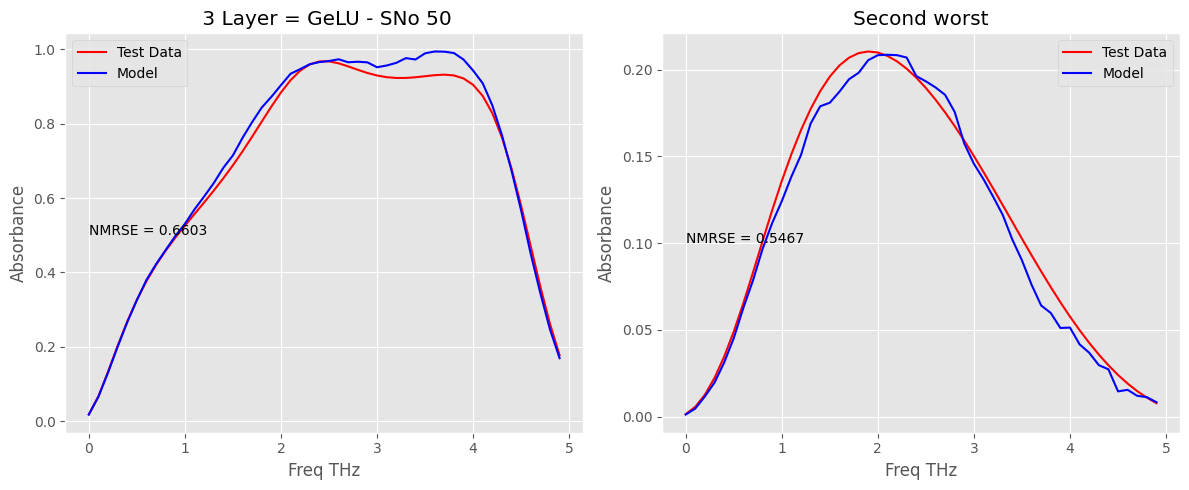

In [504]:
L_pred_m1=scaler.inverse_transform(predictions)
#L_pred_m2=scaler.inverse_transform(predictions_m2)
y_inv = scaler.inverse_transform(y_test)


w1=np.arange(0,5,0.1) #plaotting original data for verification

with plt.style.context('ggplot'):#sanity check if correct waveforms are loaded
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
   # plt.subplot(1, 2, 1) 
    
    #plt.plot(w3,y_2p_wav[1,:])
   # plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    
    axs[0].plot(w1,y_inv[30,:], color='red', label='Test Data')
    axs[0].plot(w1,L_pred_m1[30,:],label='Model', color='blue')
    axs[0].set_title(" 3 Layer = GeLU - SNo 50")
    axs[0].set_ylabel("Absorbance")
    axs[0].set_xlabel("Freq THz")
  #  axs[0].annotate("r-squared = {:.3f}".format(r2_score(y_test[1,:], predictions_m2[1,:])), (0, 0.7))
    axs[0].annotate("NMRSE = {:.4f}".format(nmrs(predictions[30,:],y_test[30,:])), (0, 0.5))
    axs[0].legend()
    
    #axs[1].subplot(1,2,2,figsize=(12, 5))
 #   axs[1].plot(w4,predictions[1,:],label='complex', color='black')
  #  axs[1].plot(w4,y_test[1,:], label='absorbance')

    axs[1].plot(w1,y_inv[8,:], color='red', label='Test Data')
    axs[1].plot(w1,L_pred_m1[8,:],label='Model', color='blue')
    axs[1].set_title("Second worst")
    axs[1].set_ylabel("Absorbance")
    axs[1].set_xlabel("Freq THz")
    axs[1].annotate("NMRSE = {:.4f}".format(nmrs(predictions[8,:],y_test[8,:])), (0, 0.1))
   # axs[1].annotate("r-squared = {:.3f}".format(r2_score(y_test[1,:], predictions[1,:])), (0, 0.55))
    axs[1].legend()
    print(r2_score(y_test[5,:].real, predictions_m2[5,:].real))           
    plt.tight_layout()
    plt.show()
    

In [307]:
from sklearn.metrics import r2_score

In [499]:
flag=0
flag_2=0
er_1=0
er_2=0
r2_2=[]
r2=[]
model_nm1=[]
model_nm2=[]
pos=[]
for i in range(len(predictions)):
    er_1 = r2_score(y_test[i,:].real, predictions[i,:].real)
    #er_2 = r2_score(y_test[i,:].real, predictions_m2[i,:].real)
    nm_1=nmrs(predictions[i,:],y_test[i,:])
    #nm_2=nmrs(predictions_m2[i,:],y_test[i,:])
    r2.append(er_1)
    r2_2.append(er_2)
    model_nm1.append(nm_1)
    #model_nm2.append(nm_2)
    pos.append(i)
    # if(er_1<er_2):
    #     #flag=er_2
    #     pos.append(er_1)
    #    # value= er_1-er_2
    #     diff_1.append(i)
    # elif(er_1>er_2):
    #     #flag_2=er_1
    #     pos_2.append(er_2)
        

In [500]:
for i in range(len(predictions)):
    print(model_nm1[i],pos[i])
  #  print(pos_2[i])

0.224180068904663 0
0.11710001183240243 1
0.15567579497461279 2
0.13779708222728695 3
0.14026254136411898 4
0.14986477678577903 5
0.2079389888025368 6
0.29387162687653956 7
0.5467002039576061 8
0.27011755547584915 9
0.14307211313429544 10
0.20925263010285566 11
0.11313857369890941 12
0.1050439369230965 13
0.08765716337950505 14
0.10471165448979088 15
0.1849584852503083 16
0.15813006376928637 17
0.23249549372938463 18
0.13110800765460906 19
0.09814376172293687 20
0.0899467938638788 21
0.11881275919379078 22
0.47947950790539634 23
0.25231602455376967 24
0.11748894417060461 25
0.3044482215636206 26
0.114275726048106 27
0.4582492745984053 28
0.09926144347150798 29
0.6603167118617613 30
0.21244457272499334 31
0.14335077634267637 32
0.11367767318723823 33
0.17126346249138338 34
0.24503790115812119 35
0.18497661266076698 36
0.16721981162143082 37
0.2304847120331532 38
0.08712847417133612 39
0.163282444513926 40
0.12258166949437156 41
0.10931413538259699 42
0.1851217102961646 43
0.204839287353

In [713]:

m1 = pickle.load(open('2L_28N_GELU_2F_ES.sav', 'rb'))
#x = pickle.load('1L_100N_GELU_3feature_ES.sav')
with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        pred_1 = m1(new_data)
pred_1= pred_1.numpy()

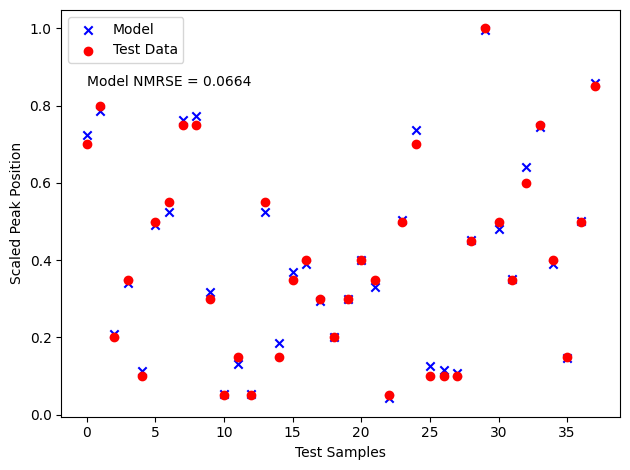

In [240]:
w1=np.linspace(0,37,38)

plt.scatter(w1,pred_1,label="Model", marker='x', color="blue")
plt.scatter(w1,y_test,label="Test Data",color="red")
plt.annotate("Model NMRSE = {:.4f}".format(nmrs(pred_1,y_test)), (0, 0.85))
plt.xlabel("Test Samples")
plt.ylabel("Scaled Peak Position")
plt.legend(loc="upper left")
  #  axs[2].set_ylim(0.5, 1)
  # axs[2].set_title("1 Layer - 100 Neurons N.N")
plt.tight_layout()
#plt.savefig('3Model_Pred', bbox_inches='tight')
plt.show()

In [75]:


#Splitting data for both models 

scaler = MinMaxScaler()
X = scaler.fit_transform(x_data)
Y= scaler.fit_transform(y_data)


X_train, X_test, y_train, y_test = train_test_split(X, Y[:,0:1], test_size=0.2, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=32)


In [76]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test, predictions)

0.04428571428571429

In [78]:
y_predict_train = model.predict(X_train)
mean_absolute_error(y_train, y_predict_train)

1.224510688924805e-18

In [84]:
from sklearn.model_selection import GridSearchCV 
parameters = {'max_depth': [2,3,4,5,6, 7, 8], 'max_leaf_nodes': [54,56,58,60,64,68,70,74],
             'max_features': [3,4,5,6,7,8,9,10, 12]}
rg1 = DecisionTreeRegressor()
rg1 = GridSearchCV(rg1, parameters)

In [85]:
rg1.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 12],
                         'max_leaf_nodes': [54, 56, 58, 60, 64, 68, 70, 74]})

In [86]:
rg1.best_params_

{'max_depth': 8, 'max_features': 7, 'max_leaf_nodes': 70}

In [87]:
y_predict = rg1.predict(X_test)
mean_absolute_error(y_test, y_predict)

0.05029298082869512

In [88]:
y_predict_train = rg1.predict(X_train)
mean_absolute_error(y_train, y_predict_train)

0.01802574059927